In [1]:
import numpy as np
from common.gridworld import GridWorld
from common.utils import greedy_probs
from collections import defaultdict


class McOffPolicyAgent:
    def __init__(self):
        self.gamma = 0.9
        self.epsilon = 0.1
        self.alpha = 0.2
        self.action_size = 4

        random_actions = {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}
        self.pi = defaultdict(lambda: random_actions)
        self.b = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
        self.memory = []

    def get_action(self, state):
        action_probs = self.b[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def add(self, state, action, reward):
        self.memory.append((state, action, reward))

    def reset(self):
        self.memory.clear()

    def update(self):
        G = 0
        rho = 1
        for state, action, reward in reversed(self.memory):
            key = (state, action)
            
            G = reward + self.gamma * rho * G
            self.Q[key] += (G - self.Q[key]) * self.alpha
            rho *= self.pi[state][action] / self.b[state][action]
            
            self.pi[state] = greedy_probs(self.Q, state, epsilon=0)
            self.b[state] = greedy_probs(self.Q, state, self.epsilon)

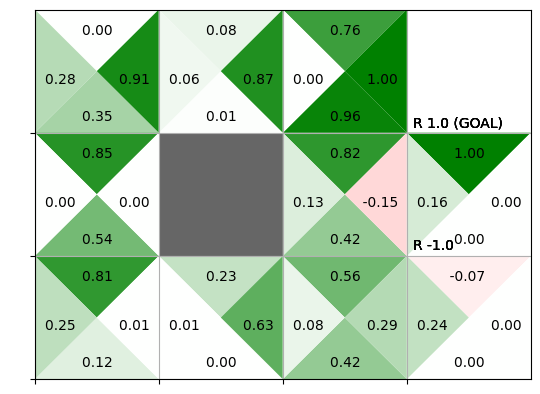

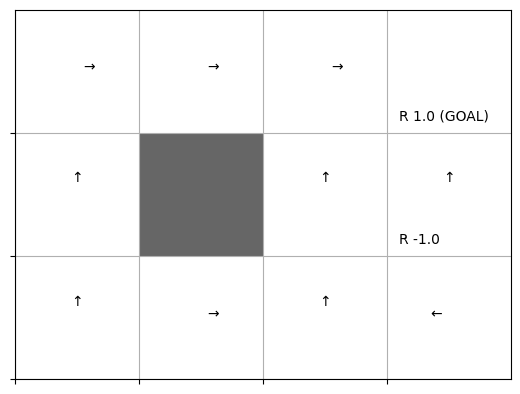

In [3]:
env = GridWorld()
agent = McOffPolicyAgent()

episodes = 10000
for episode in range(episodes):
    state = env.reset()
    agent.reset()

    while True:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        agent.add(state, action, reward)
        if done:
            agent.update()
            break
        state = next_state
env.render_q(agent.Q)